<a href="https://colab.research.google.com/github/johnM66/Thesis/blob/main/PGCSE_491_Manas_Maity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# --- Step 1: Install required package
!pip install scikit-fuzzy

# --- Step 2: Import modules
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# --- Step 3: Define fuzzy variables
pedestrian_density = ctrl.Antecedent(np.arange(0, 101, 1), 'pedestrian_density')
vehicle_flow = ctrl.Antecedent(np.arange(0, 101, 1), 'vehicle_flow')
weather = ctrl.Antecedent(np.arange(0, 4, 1), 'weather')  # 0: Clear, 1: Rain, 2: Fog, 3: Snow
green_time = ctrl.Consequent(np.arange(10, 181, 1), 'green_time')

# --- Step 4: Membership functions
pedestrian_density['low'] = fuzz.trimf(pedestrian_density.universe, [0, 0, 50])
pedestrian_density['medium'] = fuzz.trimf(pedestrian_density.universe, [20, 50, 80])
pedestrian_density['high'] = fuzz.trimf(pedestrian_density.universe, [60, 100, 100])

vehicle_flow['low'] = fuzz.trimf(vehicle_flow.universe, [0, 0, 40])
vehicle_flow['medium'] = fuzz.trimf(vehicle_flow.universe, [20, 50, 80])
vehicle_flow['high'] = fuzz.trimf(vehicle_flow.universe, [60, 100, 100])

weather['good'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['moderate'] = fuzz.trimf(weather.universe, [1, 2, 3])
weather['bad'] = fuzz.trimf(weather.universe, [2, 3, 3])

green_time['short'] = fuzz.trimf(green_time.universe, [10, 10, 60])
green_time['medium'] = fuzz.trimf(green_time.universe, [40, 90, 140])
green_time['long'] = fuzz.trimf(green_time.universe, [120, 180, 180])

# --- Step 5: Rules
rule1 = ctrl.Rule(pedestrian_density['high'] & vehicle_flow['low'] & weather['good'], green_time['long'])
rule2 = ctrl.Rule(pedestrian_density['low'] & vehicle_flow['high'] & weather['good'], green_time['long'])
rule3 = ctrl.Rule(weather['bad'], green_time['short'])
rule4 = ctrl.Rule(pedestrian_density['medium'] | vehicle_flow['medium'], green_time['medium'])

# --- Step 6: Control System
signal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
signal_sim = ctrl.ControlSystemSimulation(signal_ctrl)

def compute_green_time(pedestrian, vehicle, weather_code):
    signal_sim.input['pedestrian_density'] = pedestrian
    signal_sim.input['vehicle_flow'] = vehicle
    signal_sim.input['weather'] = weather_code
    signal_sim.compute()
    return signal_sim.output['green_time']

# --- Step 7: Test with sample inputs
test_cases = [
    {"pedestrian": 90, "vehicle": 20, "weather_code": 0, "desc": "High pedestrian, low vehicle, good weather"},
    {"pedestrian": 10, "vehicle": 85, "weather_code": 0, "desc": "Low pedestrian, high vehicle, good weather"},
    {"pedestrian": 50, "vehicle": 50, "weather_code": 2, "desc": "Medium pedestrian/vehicle, foggy"},
    {"pedestrian": 30, "vehicle": 30, "weather_code": 3, "desc": "Low, low, snow (bad weather)"},
]

for idx, case in enumerate(test_cases):
    gt = compute_green_time(case["pedestrian"], case["vehicle"], case["weather_code"])
    print(f"Test Case {idx+1}: {case['desc']}")
    print(f"  Input -> Pedestrians: {case['pedestrian']}, Vehicles: {case['vehicle']}, Weather code: {case['weather_code']}")
    print(f"  Output -> Green time: {gt:.2f} seconds\n")

Test Case 1: High pedestrian, low vehicle, good weather
  Input -> Pedestrians: 90, Vehicles: 20, Weather code: 0
  Output -> Green time: 156.67 seconds

Test Case 2: Low pedestrian, high vehicle, good weather
  Input -> Pedestrians: 10, Vehicles: 85, Weather code: 0
  Output -> Green time: 157.95 seconds

Test Case 3: Medium pedestrian/vehicle, foggy
  Input -> Pedestrians: 50, Vehicles: 50, Weather code: 2
  Output -> Green time: 90.00 seconds

Test Case 4: Low, low, snow (bad weather)
  Input -> Pedestrians: 30, Vehicles: 30, Weather code: 3
  Output -> Green time: 60.39 seconds



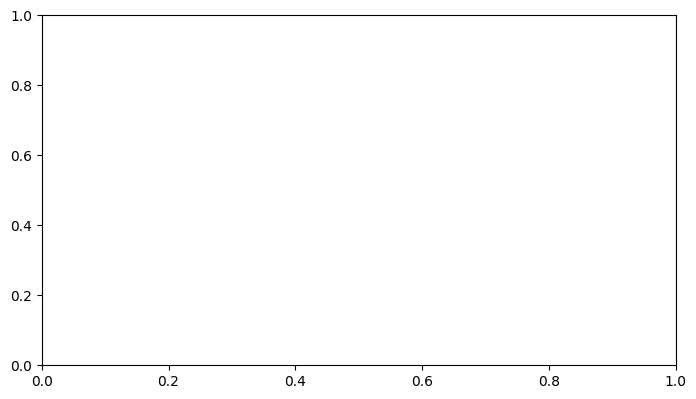

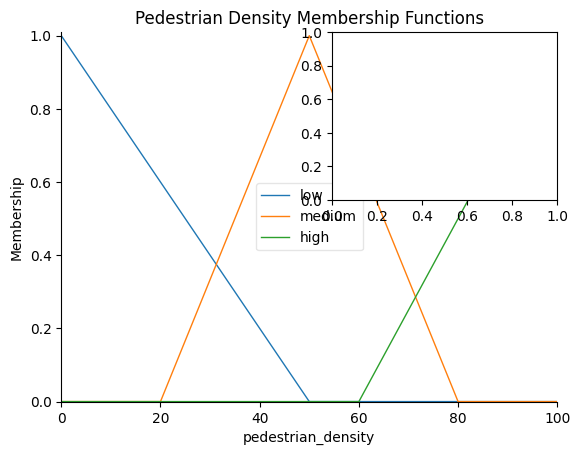

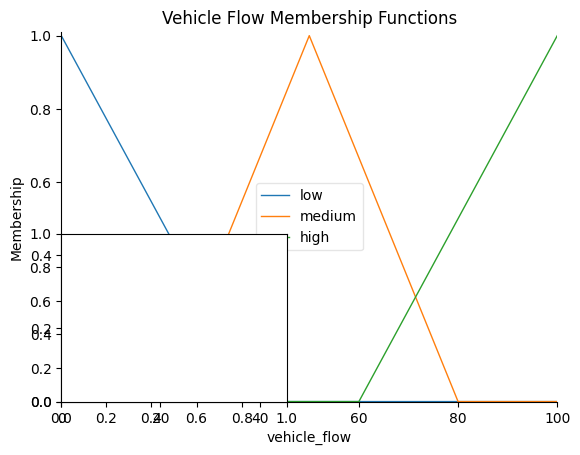

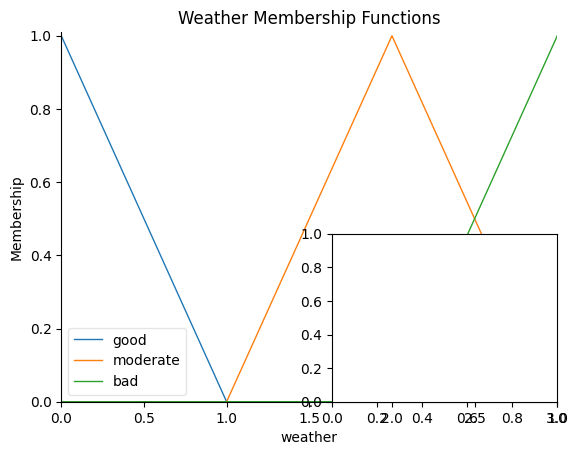

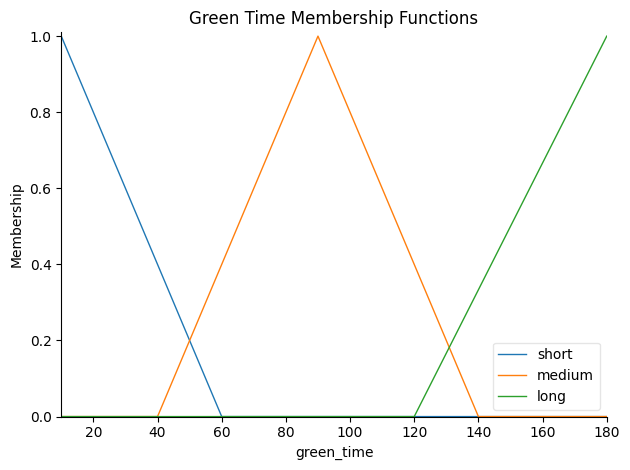

Test Case 1: High pedestrian, low vehicle, good weather
  Input -> Pedestrians: 90, Vehicles: 20, Weather code: 0
  Output -> Green time: 156.67 seconds

Test Case 2: Low pedestrian, high vehicle, good weather
  Input -> Pedestrians: 10, Vehicles: 85, Weather code: 0
  Output -> Green time: 157.95 seconds

Test Case 3: Medium pedestrian/vehicle, foggy
  Input -> Pedestrians: 50, Vehicles: 50, Weather code: 2
  Output -> Green time: 90.00 seconds

Test Case 4: Low, low, snow (bad weather)
  Input -> Pedestrians: 30, Vehicles: 30, Weather code: 3
  Output -> Green time: 60.39 seconds



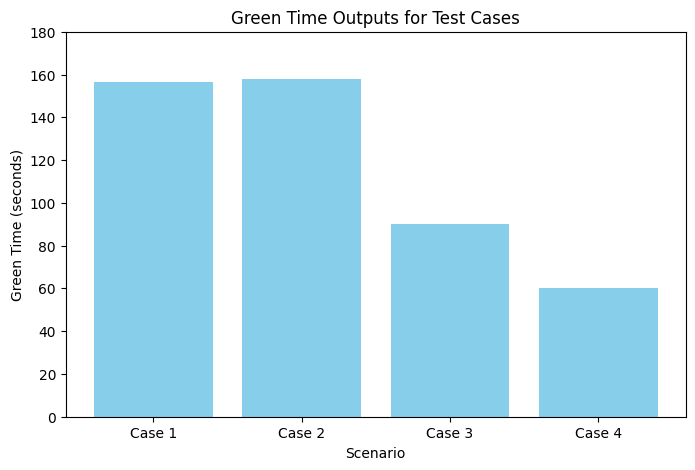

In [4]:
# Step 1: Install required package
!pip install scikit-fuzzy

# Step 2: Import modules
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 3: Define fuzzy variables
pedestrian_density = ctrl.Antecedent(np.arange(0, 101, 1), 'pedestrian_density')
vehicle_flow = ctrl.Antecedent(np.arange(0, 101, 1), 'vehicle_flow')
weather = ctrl.Antecedent(np.arange(0, 4, 1), 'weather')  # 0: Clear, 1: Rain, 2: Fog, 3: Snow
green_time = ctrl.Consequent(np.arange(10, 181, 1), 'green_time')

# Step 4: Membership functions
pedestrian_density['low'] = fuzz.trimf(pedestrian_density.universe, [0, 0, 50])
pedestrian_density['medium'] = fuzz.trimf(pedestrian_density.universe, [20, 50, 80])
pedestrian_density['high'] = fuzz.trimf(pedestrian_density.universe, [60, 100, 100])

vehicle_flow['low'] = fuzz.trimf(vehicle_flow.universe, [0, 0, 40])
vehicle_flow['medium'] = fuzz.trimf(vehicle_flow.universe, [20, 50, 80])
vehicle_flow['high'] = fuzz.trimf(vehicle_flow.universe, [60, 100, 100])

weather['good'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['moderate'] = fuzz.trimf(weather.universe, [1, 2, 3])
weather['bad'] = fuzz.trimf(weather.universe, [2, 3, 3])

green_time['short'] = fuzz.trimf(green_time.universe, [10, 10, 60])
green_time['medium'] = fuzz.trimf(green_time.universe, [40, 90, 140])
green_time['long'] = fuzz.trimf(green_time.universe, [120, 180, 180])

# Step 5: Visualize membership functions
plt.figure(figsize=(18, 10))

plt.subplot(2,2,1)
pedestrian_density.view()
plt.title("Pedestrian Density Membership Functions")

plt.subplot(2,2,2)
vehicle_flow.view()
plt.title("Vehicle Flow Membership Functions")

plt.subplot(2,2,3)
weather.view()
plt.title("Weather Membership Functions")

plt.subplot(2,2,4)
green_time.view()
plt.title("Green Time Membership Functions")

plt.tight_layout()
plt.show()

# Step 6: Define rules
rule1 = ctrl.Rule(pedestrian_density['high'] & vehicle_flow['low'] & weather['good'], green_time['long'])
rule2 = ctrl.Rule(pedestrian_density['low'] & vehicle_flow['high'] & weather['good'], green_time['long'])
rule3 = ctrl.Rule(weather['bad'], green_time['short'])
rule4 = ctrl.Rule(pedestrian_density['medium'] | vehicle_flow['medium'], green_time['medium'])

# Step 7: Control System
signal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
signal_sim = ctrl.ControlSystemSimulation(signal_ctrl)

def compute_green_time(pedestrian, vehicle, weather_code):
    signal_sim.input['pedestrian_density'] = pedestrian
    signal_sim.input['vehicle_flow'] = vehicle
    signal_sim.input['weather'] = weather_code
    signal_sim.compute()
    return signal_sim.output['green_time']

# Step 8: Test with sample inputs and visualize output
test_cases = [
    {"pedestrian": 90, "vehicle": 20, "weather_code": 0, "desc": "High pedestrian, low vehicle, good weather"},
    {"pedestrian": 10, "vehicle": 85, "weather_code": 0, "desc": "Low pedestrian, high vehicle, good weather"},
    {"pedestrian": 50, "vehicle": 50, "weather_code": 2, "desc": "Medium pedestrian/vehicle, foggy"},
    {"pedestrian": 30, "vehicle": 30, "weather_code": 3, "desc": "Low, low, snow (bad weather)"},
]

results = []
for idx, case in enumerate(test_cases):
    gt = compute_green_time(case["pedestrian"], case["vehicle"], case["weather_code"])
    results.append(gt)
    print(f"Test Case {idx+1}: {case['desc']}")
    print(f"  Input -> Pedestrians: {case['pedestrian']}, Vehicles: {case['vehicle']}, Weather code: {case['weather_code']}")
    print(f"  Output -> Green time: {gt:.2f} seconds\n")

# Visualize the green time outputs for test cases
labels = [f"Case {i+1}" for i in range(len(test_cases))]
plt.figure(figsize=(8,5))
plt.bar(labels, results, color='skyblue')
plt.ylim(0, 180)
plt.title("Green Time Outputs for Test Cases")
plt.ylabel("Green Time (seconds)")
plt.xlabel("Scenario")
plt.show()

In [5]:
# Step 1: Install dependencies
!pip install scikit-fuzzy gradio

# Step 2: Import modules
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import gradio as gr

# Step 3: Define fuzzy variables and membership functions
pedestrian_density = ctrl.Antecedent(np.arange(0, 101, 1), 'pedestrian_density')
vehicle_flow = ctrl.Antecedent(np.arange(0, 101, 1), 'vehicle_flow')
weather = ctrl.Antecedent(np.arange(0, 4, 1), 'weather')  # 0: Clear, 1: Rain, 2: Fog, 3: Snow
green_time = ctrl.Consequent(np.arange(10, 181, 1), 'green_time')

pedestrian_density['low'] = fuzz.trimf(pedestrian_density.universe, [0, 0, 50])
pedestrian_density['medium'] = fuzz.trimf(pedestrian_density.universe, [20, 50, 80])
pedestrian_density['high'] = fuzz.trimf(pedestrian_density.universe, [60, 100, 100])

vehicle_flow['low'] = fuzz.trimf(vehicle_flow.universe, [0, 0, 40])
vehicle_flow['medium'] = fuzz.trimf(vehicle_flow.universe, [20, 50, 80])
vehicle_flow['high'] = fuzz.trimf(vehicle_flow.universe, [60, 100, 100])

weather['good'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['moderate'] = fuzz.trimf(weather.universe, [1, 2, 3])
weather['bad'] = fuzz.trimf(weather.universe, [2, 3, 3])

green_time['short'] = fuzz.trimf(green_time.universe, [10, 10, 60])
green_time['medium'] = fuzz.trimf(green_time.universe, [40, 90, 140])
green_time['long'] = fuzz.trimf(green_time.universe, [120, 180, 180])

# Step 4: Define fuzzy rules
rule1 = ctrl.Rule(pedestrian_density['high'] & vehicle_flow['low'] & weather['good'], green_time['long'])
rule2 = ctrl.Rule(pedestrian_density['low'] & vehicle_flow['high'] & weather['good'], green_time['long'])
rule3 = ctrl.Rule(weather['bad'], green_time['short'])
rule4 = ctrl.Rule(pedestrian_density['medium'] | vehicle_flow['medium'], green_time['medium'])

# Step 5: Create fuzzy control system
signal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
signal_sim = ctrl.ControlSystemSimulation(signal_ctrl)

# Step 6: Function to compute green time (Real-Time Data Acquisition can be integrated here)
def compute_green_time(pedestrian, vehicle, weather_code):
    # Here, you could replace the input values with real-time sensor data acquisition
    signal_sim.input['pedestrian_density'] = pedestrian
    signal_sim.input['vehicle_flow'] = vehicle
    signal_sim.input['weather'] = weather_code
    signal_sim.compute()
    return f"{signal_sim.output['green_time']:.2f} seconds"

# Step 7: Web UI using Gradio
def gradio_interface(pedestrian_density, vehicle_flow, weather):
    weather_map = {"Clear": 0, "Rain": 1, "Fog": 2, "Snow": 3}
    result = compute_green_time(pedestrian_density, vehicle_flow, weather_map[weather])
    return f"Suggested green time: {result}"

weather_options = ["Clear", "Rain", "Fog", "Snow"]

iface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Slider(0, 100, value=50, label="Pedestrian Density (0-100)"),
        gr.Slider(0, 100, value=50, label="Vehicle Flow (0-100)"),
        gr.Dropdown(weather_options, value="Clear", label="Weather Condition")
    ],
    outputs="text",
    title="Fuzzy Logic-Based Intelligent Traffic Signal Control",
    description="Adjust the sliders and select weather to see the recommended green signal time."
)

iface.launch(share=True)  # Use share=True to get a public link if needed

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b6d4df5cc92ef0dde7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
